# CONNECTION 

In [83]:
import psycopg2  #adapter for python

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)
print("Connected to the PostgreSQL database!")


Connected to the PostgreSQL database!


# TABLE CREATION

In [9]:
cur = conn.cursor()

# Create the users table
cur.execute("""
CREATE TABLE users (
    id SERIAL PRIMARY KEY,
    username VARCHAR(100) NOT NULL,
    email VARCHAR(100) NOT NULL UNIQUE,
    password VARCHAR(100) NOT NULL,
    created_at TIMESTAMP DEFAULT NOW()
);
""")

# Create the movies table
cur.execute("""
CREATE TABLE movies (
    id SERIAL PRIMARY KEY,
    title VARCHAR(100) NOT NULL,
    release_year INTEGER,
    genre VARCHAR(100),
    director VARCHAR(100),
    created_at TIMESTAMP DEFAULT NOW()
);
""")

# Create the genres table
cur.execute("""
CREATE TABLE genres (
    id SERIAL PRIMARY KEY,
    name VARCHAR(100) NOT NULL UNIQUE
);
""")

# Create the ratings table
cur.execute("""
CREATE TABLE ratings (
    id SERIAL PRIMARY KEY,
    movie_id INTEGER REFERENCES movies(id),
    user_id INTEGER REFERENCES users(id),
    rating INTEGER,
    created_at TIMESTAMP DEFAULT NOW()
);
""")

# Create the subscriptions table
cur.execute("""
CREATE TABLE subscriptions (
    id SERIAL PRIMARY KEY,
    user_id INTEGER REFERENCES users(id),
    start_date DATE,
    end_date DATE,
    created_at TIMESTAMP DEFAULT NOW()
);
""")

# Commit the changes to the database
conn.commit()

cur.close()
conn.close()

# INSERT VALUES

In [10]:
import psycopg2
from faker import Faker
import random
import datetime

fake = Faker()

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cur = conn.cursor()

# Insert 100 records into all tables

for _ in range(100):
    username = fake.user_name()
    email = fake.email()
    password = fake.password()
    cur.execute("""
    INSERT INTO users (username, email, password) VALUES (%s, %s, %s);
    """, (username, email, password))

for _ in range(100):
    title = fake.catch_phrase()
    release_year = random.randint(2000, 2022)
    genre = fake.word()
    director = fake.name()
    cur.execute("""
    INSERT INTO movies (title, release_year, genre, director) VALUES (%s, %s, %s, %s);
    """, (title, release_year, genre, director))

existing_genres = set()
cur.execute("SELECT name FROM genres")
for row in cur.fetchall():
    existing_genres.add(row[0])

for _ in range(100):
    name = fake.word()
    while name in existing_genres:
        name = fake.word()
    existing_genres.add(name)
    cur.execute("""
    INSERT INTO genres (name) VALUES (%s);
    """, (name,))

cur.execute("SELECT id FROM movies")
movie_ids = [row[0] for row in cur.fetchall()]

cur.execute("SELECT id FROM users")
user_ids = [row[0] for row in cur.fetchall()]

for _ in range(100):
    movie_id = random.choice(movie_ids)
    user_id = random.choice(user_ids)
    rating = random.randint(1, 5)
    cur.execute("""
    INSERT INTO ratings (movie_id, user_id, rating) VALUES (%s, %s, %s);
    """, (movie_id, user_id, rating))

cur.execute("SELECT id FROM users")
user_ids = [row[0] for row in cur.fetchall()]

for _ in range(100):
    user_id = random.choice(user_ids)
    start_date = fake.date_between(start_date='-1y', end_date='today')
    end_date = start_date + datetime.timedelta(days=random.randint(30, 365))
    cur.execute("""
    INSERT INTO subscriptions (user_id, start_date, end_date) VALUES (%s, %s, %s);
    """, (user_id, start_date, end_date))

conn.commit()

cur.close()
conn.close()


# PRINT THE VALUES OF TABLES 

In [3]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cur = conn.cursor()

# Retrieve and print the inserted values for each table

# Users table
cur.execute("SELECT * FROM users")
users = cur.fetchall()
print("Users:")
for user in users:
    print(user)

# Movies table
cur.execute("SELECT * FROM movies")
movies = cur.fetchall()
print("Movies:")
for movie in movies:
    print(movie)

# Genres table
cur.execute("SELECT * FROM genres")
genres = cur.fetchall()
print("Genres:")
for genre in genres:
    print(genre)

# Ratings table
cur.execute("SELECT * FROM ratings")
ratings = cur.fetchall()
print("Ratings:")
for rating in ratings:
    print(rating)

# Subscriptions table
cur.execute("SELECT * FROM subscriptions")
subscriptions = cur.fetchall()
print("Subscriptions:")
for subscription in subscriptions:
    print(subscription)

cur.close()
conn.close()


Users:
(1, 'rgonzales', 'curtismurphy@example.com', 'r*i^1Fcz*R', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(2, 'tmora', 'zdonovan@example.com', '5_MA+Owe^U', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(3, 'tkelly', 'simmonssabrina@example.com', '9@2lYn47RK', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(4, 'michael94', 'harold60@example.org', '$IR!3TuSQY', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(5, 'thester', 'rhonda14@example.com', '_8tRTI(!(w', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(6, 'dbauer', 'martinezjason@example.net', 'D$3B)GPxDK', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(7, 'robinbrown', 'johnsonbrandon@example.org', '^dX0r5wBq2', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(8, 'stevensrachel', 'shawnsanchez@example.com', '#H72$CFjbt', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(9, 'daniel11', 'travis77@example.org', '#qwZq01v*5', datetime.datetime(2023, 6, 14, 12, 19, 49, 55600))
(10, 'moranjonathan', 

Genres:
(1, 'mean')
(2, 'family')
(3, 'others')
(4, 'resource')
(5, 'decide')
(6, 'week')
(7, 'your')
(8, 'peace')
(9, 'show')
(10, 'tough')
(11, 'break')
(12, 'church')
(13, 'stop')
(14, 'lot')
(15, 'attorney')
(16, 'easy')
(17, 'enjoy')
(18, 'detail')
(19, 'two')
(20, 'bag')
(21, 'exactly')
(22, 'rule')
(23, 'may')
(24, 'soon')
(25, 'challenge')
(26, 'wait')
(27, 'within')
(28, 'goal')
(29, 'nor')
(30, 'phone')
(31, 'machine')
(32, 'attention')
(33, 'difference')
(34, 'dream')
(35, 'democratic')
(36, 'a')
(37, 'too')
(38, 'several')
(39, 'in')
(40, 'interesting')
(41, 'film')
(42, 'market')
(43, 'state')
(44, 'discover')
(45, 'discuss')
(46, 'politics')
(47, 'born')
(48, 'Mrs')
(49, 'without')
(50, 'him')
(51, 'laugh')
(52, 'appear')
(53, 'business')
(54, 'she')
(55, 'action')
(56, 'job')
(57, 'central')
(58, 'assume')
(59, 'truth')
(60, 'finish')
(61, 'figure')
(62, 'bring')
(63, 'article')
(64, 'another')
(65, 'interest')
(66, 'of')
(67, 'dark')
(68, 'reflect')
(69, 'sense')
(70, '

# COST BASED ALGO

# USER TABLE

In [ ]:
import psycopg2

In [1]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

# Enable the pg_stat_statements extension
with conn.cursor() as cursor:
    cursor.execute("CREATE EXTENSION IF NOT EXISTS pg_stat_statements;")

# Collect Query Workload
with conn.cursor() as cursor:
    cursor.execute("SELECT query, count(*) as frequency FROM pg_stat_statements GROUP BY query;")
    query_workload = cursor.fetchall()

# Analyze Query Workload
# Perform query analysis and identify frequently executed queries and their performance characteristics


# Index Creation
with conn.cursor() as cursor:
    cursor.execute("CREATE INDEX IF NOT EXISTS index1 ON users (id, username, email, password, created_at);")


conn.close()

# VERIFICATION-1

In [8]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

# Collect Query Workload
with conn.cursor() as cursor:
    cursor.execute("SELECT query, count(*) as frequency FROM pg_stat_statements GROUP BY query;")
    query_workload = cursor.fetchall()

for query, frequency in query_workload:
    
    print(f"Query: {query}")
    print(f"Frequency: {frequency}")
    print("-----------------------")

    
with conn.cursor() as explain_cursor:
        explain_cursor.execute("EXPLAIN ANALYZE " + query)
        query_plan = explain_cursor.fetchall()

for plan in query_plan:
    print(plan[0])    

conn.close()


Query: SELECT oid as "ID",
  pg_catalog.pg_get_userbyid(lomowner) as "Owner",
  pg_catalog.obj_description(oid, $1) as "Description"
FROM pg_catalog.pg_largeobject_metadata
ORDER BY oid
Frequency: 1
-----------------------
Query: SELECT * FROM users
Frequency: 1
-----------------------
Query: EXPLAIN (ANALYZE, FORMAT JSON) SELECT * FROM users WHERE created_at > '2022-01-01'
Frequency: 1
-----------------------
Query: SELECT oid as "ID", pg_catalog.pg_get_userbyid(lomowner) as "Owner", pg_catalog.obj_description(oid) as "Description" FROM pg_catalog.pg_largeobject_metadata ORDER BY oid
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stanullfrac,
               s.stawidth,
               pg_catalog.format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdrop

# VERIFICATION-2

Column       : id
I/O Cost     : 2
CPU Usage    : 3
Memory Usage : 0
Data Type    : integer
-----------------------
Column       : username
I/O Cost     : 2
CPU Usage    : 3
Memory Usage : 0
Data Type    : character varying(100)
-----------------------
Column       : email
I/O Cost     : 2
CPU Usage    : 3
Memory Usage : 0
Data Type    : character varying(100)
-----------------------
Column       : password
I/O Cost     : 2
CPU Usage    : 3
Memory Usage : 0
Data Type    : character varying(100)
-----------------------
Column       : created_at
I/O Cost     : 1
CPU Usage    : 3
Memory Usage : 0
Data Type    : timestamp without time zone
-----------------------
Column with the lowest I/O cost, considering CPU usage:
Column: created_at


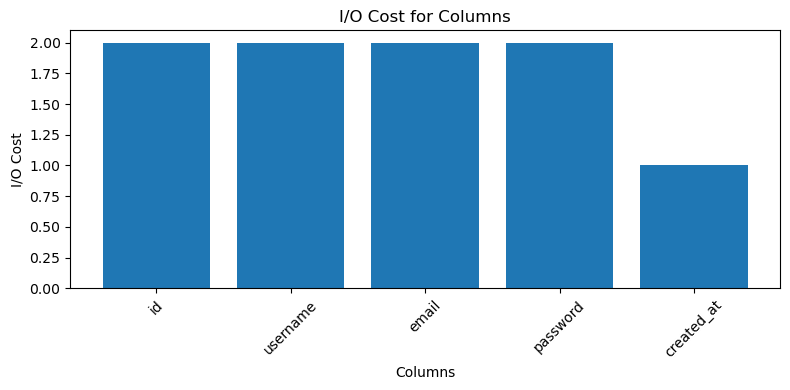

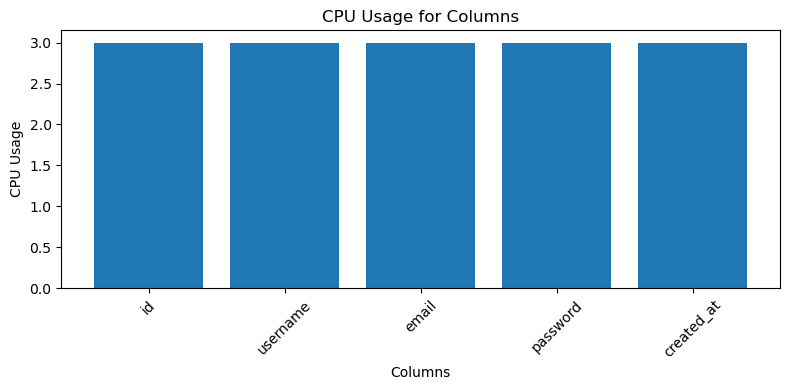

In [10]:
import psycopg2
import matplotlib.pyplot as plt
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

table_name = "users"

# Fetch column information from pg_stats and pg_statistic
with conn.cursor() as cursor:
    cursor.execute(f"""
        SELECT a.attname,
               s.stakind1 AS io_cost,
               s.stakind2 AS cpu_usage,
               s.stakind3 AS memory_usage,
               format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = '{table_name}'::regclass
          AND a.attnum > 0
          AND NOT a.attisdropped
        ORDER BY a.attnum
    """)
    columns = cursor.fetchall()

for column in columns:
    column_name = column[0]
    #distinct_values = column[1]
    io_cost = column[1]
    cpu_usage = column[2]
    memory_usage = column[3]
    data_type = column[4]
    
    print(f"Column       : {column_name}")
    #print(f"Distinct Values: {distinct_values}")
    print(f"I/O Cost     : {io_cost}") #arbitrary units[amount of data in and out]
    print(f"CPU Usage    : {cpu_usage}")  #processing time[seconds]
    print(f"Memory Usage : {memory_usage}") #intermediate result storage[KB]
    print(f"Data Type    : {data_type}")
    print("-----------------------")
    
lowest_column = min(columns, key=lambda x: (x[1], x[2], x[3]))

column_name = lowest_column[0]
io_cost = lowest_column[1]
cpu_usage = lowest_column[2]
memory_usage = lowest_column[3]
data_type = lowest_column[4]

print("Column with the lowest I/O cost, considering CPU usage:")
print(f"Column: {column_name}")



conn.close()

column_names = [column[0] for column in columns]
io_costs = [column[1] for column in columns]
cpu_usages = [column[2] for column in columns]

plt.figure(figsize=(8, 4))
plt.bar(column_names, io_costs)
plt.title("I/O Cost for Columns")
plt.xlabel("Columns")
plt.ylabel("I/O Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(column_names, cpu_usages)
plt.title("CPU Usage for Columns")
plt.xlabel("Columns")
plt.ylabel("CPU Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# VERIFICATION-3

In [2]:
import psycopg2
import time

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

query = """
    SELECT users.username, movies.title, ratings.rating
    FROM users
    JOIN ratings ON users.id = ratings.user_id
    JOIN movies ON ratings.movie_id = movies.id
    WHERE movies.genre = 'Action'
    ORDER BY ratings.rating DESC
    LIMIT 10;
""" #top 10 action movies

# measure execution time
start_time = time.perf_counter()
with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()
execution_time = time.perf_counter() - start_time

print(f"Execution Time: {execution_time} seconds")

conn.close()


Execution Time: 0.015883600000051956 seconds


# TEST AND VALIDATION

In [1]:
import psycopg2
import time

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

table_name = "users"

queries = [
    "SELECT * FROM users WHERE created_at > '2022-01-01'",
    "SELECT * FROM users WHERE username = 'john_doe'",
    "SELECT * FROM users WHERE email LIKE '%example.com'",
    # Add more queries to test
]

print("Query execution without indexes:")
for query in queries:
    start_time = time.time()

    with conn.cursor() as cursor:
        cursor.execute(query)
        rows = cursor.fetchall()

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Query: {query}")
    print(f"Execution Time: {execution_time} seconds")
    print(f"Result Rows: {len(rows)}")
    print("-----------------------")

print("")
print("Query execution with indexes:")
with conn.cursor() as cursor:
    cursor.execute(f"EXPLAIN (ANALYZE, FORMAT JSON) {';'.join(queries)};")
    execution_plans = cursor.fetchall()

for query, execution_plan in zip(queries, execution_plans):
    start_time = time.time()

    with conn.cursor() as cursor:
        cursor.execute(query)
        rows = cursor.fetchall()

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Query: {query}")
    print(f"Execution Time: {execution_time} seconds")
    print(f"Result Rows: {len(rows)}")
    print("-----------------------")

conn.close()


Query execution without indexes:
Query: SELECT * FROM users WHERE created_at > '2022-01-01'
Execution Time: 0.49938297271728516 seconds
Result Rows: 100
-----------------------
Query: SELECT * FROM users WHERE username = 'john_doe'
Execution Time: 0.10935235023498535 seconds
Result Rows: 0
-----------------------
Query: SELECT * FROM users WHERE email LIKE '%example.com'
Execution Time: 0.031250953674316406 seconds
Result Rows: 32
-----------------------

Query execution with indexes:
Query: SELECT * FROM users WHERE created_at > '2022-01-01'
Execution Time: 0.015605688095092773 seconds
Result Rows: 100
-----------------------
Query: SELECT * FROM users WHERE username = 'john_doe'
Execution Time: 0.0 seconds
Result Rows: 0
-----------------------
Query: SELECT * FROM users WHERE email LIKE '%example.com'
Execution Time: 0.0 seconds
Result Rows: 32
-----------------------


# VISUALIZATION

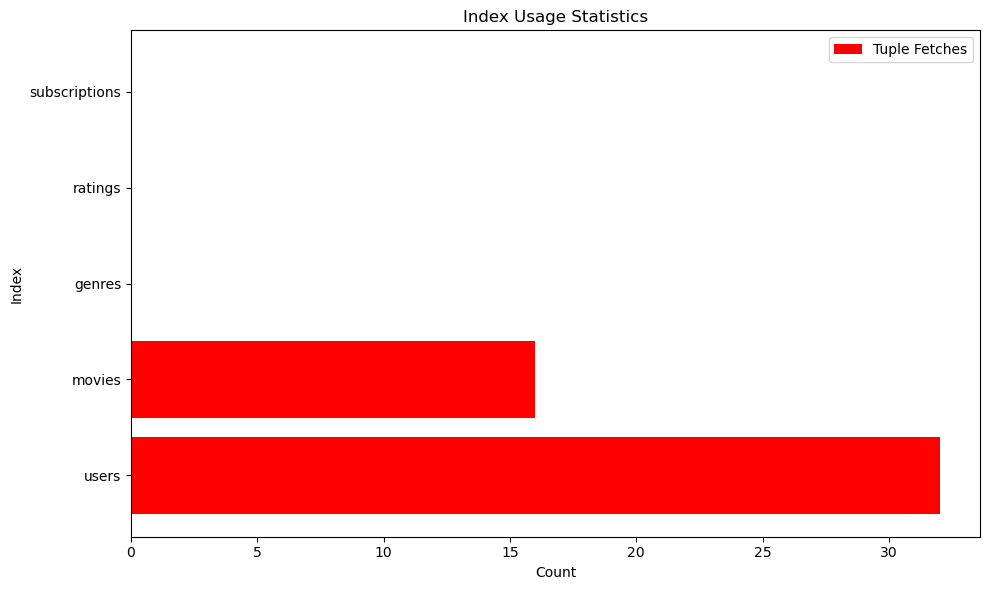

In [90]:
import psycopg2
import matplotlib.pyplot as plt

def plot_index_usage():
    conn = psycopg2.connect(
        host="localhost",
        port="5432",
        database="postgres",
        user="postgres",
        password="Kre@2002"
    )

    with conn.cursor() as cursor:
        cursor.execute("""
            SELECT relname, idx_tup_fetch
            FROM pg_stat_user_indexes
            ORDER BY idx_scan DESC
        """)
        data = cursor.fetchall()

    indexes = [row[0] for row in data]
    tuple_fetches = [row[1] for row in data]

    # Plotting the index usage statistics
    plt.figure(figsize=(10, 6))
   # plt.barh(indexes, tuple_reads, color='g', label='Tuple Reads')
    plt.barh(indexes, tuple_fetches, color='r', label='Tuple Fetches')
    plt.xlabel('Count')
    plt.ylabel('Index')
    plt.title('Index Usage Statistics')
    plt.legend()
    plt.tight_layout()
    plt.show()

    conn.close()

plot_index_usage()


# MONITOR AND REFINE

In [96]:
import psycopg2
import time

conn = psycopg2.connect(database="postgres", user="postgres", password="Kre@2002", host="localhost", port="5432")
cur = conn.cursor()

def measure_query_execution_time(query):
    start_time = time.time()
    cur.execute(query)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

query = "SELECT * FROM movies WHERE release_year = 2021"

# Measure initial query execution time
initial_execution_time = measure_query_execution_time(query)
print(f"Initial query execution time: {initial_execution_time} seconds")

# Monitor and refine
for i in range(10):
    execution_time = measure_query_execution_time(query)
    print(f"Query execution time (iteration {i+1}): {execution_time} seconds")
    
    
    time.sleep(5)  # Wait for 5 seconds before next iteration

cur.close()
conn.close()


Initial query execution time: 0.0 seconds
Query execution time (iteration 1): 0.0 seconds
Query execution time (iteration 2): 0.0 seconds
Query execution time (iteration 3): 0.0010769367218017578 seconds
Query execution time (iteration 4): 0.0 seconds
Query execution time (iteration 5): 0.0009868144989013672 seconds
Query execution time (iteration 6): 0.0010042190551757812 seconds
Query execution time (iteration 7): 0.0 seconds
Query execution time (iteration 8): 0.0 seconds
Query execution time (iteration 9): 0.0 seconds
Query execution time (iteration 10): 0.0 seconds


# MOVIES TABLE

In [26]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

with conn.cursor() as cursor:
    cursor.execute("CREATE EXTENSION IF NOT EXISTS pg_stat_statements;")

# Collect Query Workload
with conn.cursor() as cursor:
    cursor.execute("SELECT query, count(*) as frequency FROM pg_stat_statements GROUP BY query;")
    query_workload = cursor.fetchall()


with conn.cursor() as cursor:
    # Create the necessary indexes based on the index selection
    cursor.execute("CREATE INDEX IF NOT EXISTS index1 ON movies (id, title, release_year, genre, director, created_at);")
    # Repeat for all the required indexes


conn.close()


# TABLE EXISTENCE

In [28]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cur = conn.cursor()

# Check if the tables exist
cur.execute("SELECT EXISTS(SELECT 1 FROM information_schema.tables WHERE table_name='users')")
users_table_exists = cur.fetchone()[0]

cur.execute("SELECT EXISTS(SELECT 1 FROM information_schema.tables WHERE table_name='movies')")
movies_table_exists = cur.fetchone()[0]

cur.execute("SELECT EXISTS(SELECT 1 FROM information_schema.tables WHERE table_name='genres')")
genres_table_exists = cur.fetchone()[0]

cur.execute("SELECT EXISTS(SELECT 1 FROM information_schema.tables WHERE table_name='ratings')")
ratings_table_exists = cur.fetchone()[0]

cur.execute("SELECT EXISTS(SELECT 1 FROM information_schema.tables WHERE table_name='subscriptions')")
subscriptions_table_exists = cur.fetchone()[0]

# Print the table existence status
print("Users table exists:", users_table_exists)
print("Movies table exists:", movies_table_exists)
print("Genres table exists:", genres_table_exists)
print("Ratings table exists:", ratings_table_exists)
print("Subscriptions table exists:", subscriptions_table_exists)

cur.close()
conn.close()


Users table exists: True
Movies table exists: True
Genres table exists: True
Ratings table exists: True
Subscriptions table exists: True


# DROP TABLE

In [6]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cur = conn.cursor()


cur.execute("DROP TABLE IF EXISTS subscriptions")

cur.execute("DROP TABLE IF EXISTS ratings")

cur.execute("DROP TABLE IF EXISTS movies")

cur.execute("DROP TABLE IF EXISTS genres")

cur.execute("DROP TABLE IF EXISTS users")

conn.commit()

cur.close()
conn.close()


In [1]:
pip install pyttsx3 speechrecognition pyaudio


     -------------------------------------- 32.8/32.8 MB 944.7 kB/s eta 0:00:00
     ------------------------------------ 164.1/164.1 kB 491.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
Query: SELECT oid as "ID",
  pg_catalog.pg_get_userbyid(lomowner) as "Owner",
  pg_catalog.obj_description(oid, $1) as "Description"
FROM pg_catalog.pg_largeobject_metadata
ORDER BY oid
Frequency: 1
-----------------------
Query: SELECT * FROM users
Frequency: 1
-----------------------
Query: EXPLAIN (ANALYZE, FORMAT JSON) SELECT * FROM users WHERE created_at > '2022-01-01'
Frequency: 1
-----------------------
Query: SELECT oid as "ID", pg_catalog.pg_get_userbyid(lomowner) as "Owner", pg_catalog.obj_description(oid) as "Description" FROM pg_catalog.pg_largeobject_metadata ORDER BY oid
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stanullfrac,
               s.stawidth,
               pg_catalog.format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdropped
        ORDER BY a.attnum
Frequency: 1
-----------------------
Query: EXPLAIN (FORMAT JSON) SELECT * FROM users
Frequency: 1
-----------------------
Query: SELECT relname, idx_scan, idx_tup_read, idx_tup_fetch
            FROM pg_stat_user_indexes
            ORDER BY idx_scan DESC
Frequency: 1
-----------------------
Query: SELECT * FROM pg_stats WHERE tablename = $1
Frequency: 1
-----------------------
Query: CREATE INDEX IF NOT EXISTS index2 ON movies (id, title, release_year, genre, director, created_at)
Frequency: 1
-----------------------
Query: select * from genres
Frequency: 1
-----------------------
Query: SELECT * FROM pg_stat_statements
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stakind1 AS io_cost,
               s.stakind2 AS cpu_usage,
               s.stakind3 AS memory_usage,
               format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdropped
        ORDER BY a.attnum
Frequency: 1
-----------------------
Query: CREATE INDEX IF NOT EXISTS index1 ON users (id, username, email, password, created_at)
Frequency: 1
-----------------------
Query: SELECT * FROM movies
Frequency: 1
-----------------------
Query: SELECT relname, idx_tup_read, idx_tup_fetch
            FROM pg_stat_user_indexes
            ORDER BY idx_scan DESC
Frequency: 1
-----------------------
Query: SELECT users.username, movies.title, ratings.rating
    FROM users
    JOIN ratings ON users.id = ratings.user_id
    JOIN movies ON ratings.movie_id = movies.id
    WHERE movies.genre = $1
    ORDER BY ratings.rating DESC
    LIMIT $2
Frequency: 1
-----------------------
Query: CREATE EXTENSION IF NOT EXISTS pg_stat_statements
Frequency: 1
-----------------------
Query: SELECT * FROM users WHERE email LIKE $1
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stadistinct AS distinct_values,
               s.stakind1 AS io_cost,
               s.stakind2 AS cpu_usage,
               s.stakind3 AS memory_usage,
               format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdropped
        ORDER BY a.attnum
Frequency: 1
-----------------------
Query: BEGIN
Frequency: 1
-----------------------
Query: SELECT query, count(*) as frequency FROM pg_stat_statements GROUP BY query
Frequency: 1
-----------------------
Query: SELECT * FROM users WHERE username = $1
Frequency: 1
-----------------------
Query: select * from ratings
Frequency: 1
-----------------------
Query: SELECT * FROM movies WHERE release_year = $1
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stadistinct,
               s.stanullfrac,
               s.stawidth,
               pg_catalog.format_type(a.atttypid, a.atttypmod) AS data_type
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdropped
        ORDER BY a.attnum
Frequency: 1
-----------------------
Query: SELECT pg_stat_statements_reset()
Frequency: 1
-----------------------
Query: CREATE INDEX IF NOT EXISTS index1 ON movies (id, title, release_year, genre, director, created_at)
Frequency: 1
-----------------------
Query: SELECT * FROM users WHERE created_at > $1
Frequency: 1
-----------------------
Query: SELECT a.attname,
               s.stadistinct
        FROM pg_attribute AS a
        JOIN pg_statistic AS s ON s.starelid = a.attrelid AND s.staattnum = a.attnum
        WHERE a.attrelid = $1::regclass
          AND a.attnum > $2
          AND NOT a.attisdropped
        ORDER BY a.attnum
Frequency: 1
-----------------------
Query: SELECT relname, idx_tup_fetch
            FROM pg_stat_user_indexes
            ORDER BY idx_scan DESC
Frequency: 1
-----------------------
Query: SELECT * FROM user
Frequency: 1
-----------------------
Function Scan on "user"  (cost=0.00..0.01 rows=1 width=64) (actual time=0.030..0.033 rows=1 loops=1)
Planning Time: 0.116 ms
Execution Time: 0.127 ms

# APPROACH -2

In [13]:
from faker import Faker
import psycopg2

# Create a Faker instance
fake = Faker()

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cursor = conn.cursor()

# Create the table
create_table_query = '''
    CREATE TABLE IF NOT EXISTS records1 (
        id SERIAL PRIMARY KEY,
        name TEXT,
        job TEXT,
        email TEXT,
        address TEXT,
        salary TEXT
    )
'''
cursor.execute(create_table_query)

# Insert values into the table
insert_query = '''
    INSERT INTO records1 (name, job, email, address, salary)
    VALUES (%s, %s, %s, %s, %s)
'''

for _ in range(50):
    attribute1 = fake.name()
    attribute2 = fake.job()
    attribute3 = fake.email()
    attribute4 = fake.address()
    attribute5 = fake.phone_number()

    cursor.execute(insert_query, (attribute1, attribute2, attribute3, attribute4, attribute5))

# Commit the changes and close the connection
conn.commit()
conn.close()


In [14]:
import psycopg2
import pandas as pd

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

cursor = conn.cursor()

# Select all values from the table
select_query = "SELECT * FROM records1"
cursor.execute(select_query)

# Fetch the column names
columns = [desc[0] for desc in cursor.description]

# Fetch the results
results = cursor.fetchall()

# Create a DataFrame
df = pd.DataFrame(results, columns=columns)

# Close the connection
conn.close()
df

,id,name,job,email,address,salary
0,1,Aaron Price,Chief Operating Officer,darryl99@example.com,"8407 Reilly Roads\nSouth Wendy, DE 43662",664.770.0286x39419
1,2,Erica Porter,Emergency planning/management officer,qnorman@example.org,"87936 Kristin Isle Suite 843\nNorth Richard, L...",+1-422-596-2066x890
2,3,Michelle Hicks,Risk analyst,allenbrooke@example.org,"PSC 7600, Box 2985\nAPO AA 30190",001-642-874-6003x17448
3,4,Stacey Walton,Communications engineer,fjennings@example.net,"06814 Jacob Islands\nPort Jason, GA 04173",001-772-811-1679
4,5,Erik Sanders,IT trainer,croth@example.net,Unit 9419 Box 4164\nDPO AP 98574,9352264785
5,6,Anna Johnson,Print production planner,kdavid@example.org,"03028 Brown Wall\nFernandoton, GU 20333",001-524-541-4999x2133
6,7,Donald Goodman,"Engineer, electronics",angelica92@example.net,"1394 Larson Motorway\nPort Danielle, VA 89128",001-751-760-9452x9401
7,8,Amy Gibson,Warden/ranger,suzanne21@example.com,"2833 Ethan Shoals\nGarciaton, MT 41669",001-796-210-9713
8,9,Eric Hughes,Regulatory affairs officer,mirandahayes@example.org,"0751 Thomas Rapids Apt. 283\nLake Evelynville,...",318-681-4083
9,10,Deanna Gardner,"Embryologist, clinical",johnmartin@example.com,95226 James Knolls Apt. 858\nWest Raymondville...,799.629.5827x9680


In [16]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="postgres",
    user="postgres",
    password="Kre@2002"
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Execute the query to find the most frequently used attribute
query = '''
    SELECT attribute, COUNT(*) as frequency
    FROM (
        SELECT 'name' as attribute FROM records1
        UNION ALL
        SELECT 'job' as attribute FROM records1
        UNION ALL
        SELECT 'email' as attribute FROM records1
        UNION ALL
        SELECT 'address' as attribute FROM records1
        UNION ALL
        SELECT 'salary' as attribute FROM records1
    ) t
    GROUP BY attribute
    ORDER BY frequency DESC
    LIMIT 1
'''

cursor.execute(query)

# Fetch the result
result = cursor.fetchone()

if result:
    most_frequent_attribute = result[0]
    frequency = result[1]
    print(f"The most frequently used attribute is '{most_frequent_attribute}' with a frequency of {frequency}.")
else:
    print("No attributes found in the records.")

# Close the cursor and connection
cursor.close()
conn.close()


The most frequently used attribute is 'email' with a frequency of 50.


In [12]:
import psycopg2
from psycopg2 import Error
import time

def calculate_frequency(cursor):
    frequency = {}
    select_query = "SELECT query, COUNT(*) AS frequency FROM pg_stat_statements GROUP BY query"
    cursor.execute(select_query)
    rows = cursor.fetchall()

    for row in rows:
        query = row[0]
        freq = row[1]
        frequency[query] = freq

    return frequency

def measure_execution_time(cursor):
    execution_time = {}
    sample_queries = [
        "SELECT * FROM employees WHERE id = 1",
        "SELECT * FROM employees WHERE age = 19",
        "SELECT * FROM employees WHERE email = 'johndoe@example.com'",
        # Add more sample queries for other attributes
    ]

    # Initialize execution time for all queries to 0
    for query in frequency:
        execution_time[query] = 0

    for query in sample_queries:
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()  # Consume the results
        end_time = time.time()
        execution_time[query] += end_time - start_time

    return execution_time

try:
    connection = psycopg2.connect(
        host="localhost",
        port="5432",
        database="postgres",
        user="postgres",
        password="Kre@2002"
    )

    if connection:
        cursor = connection.cursor()

        # Enable the pg_stat_statements extension
        cursor.execute("CREATE EXTENSION IF NOT EXISTS pg_stat_statements;")

        # Replace 'your_table_name' with the actual name of your table
        frequency = calculate_frequency(cursor)
        execution_time = measure_execution_time(cursor)

        for query, freq in frequency.items():
            print(f"Query: {query} - Frequency: {freq}")

        for query, time in execution_time.items():
            print(f"Query: {query} - Execution Time: {time} seconds")

except Error as e:
    print("Error connecting to PostgreSQL database:", e)

finally:
    if connection:
        cursor.close()
        connection.close()
        print("Connection closed.")


Connection closed.


KeyError: 'SELECT * FROM employees WHERE id = 1'